#### **ASUU STRIKES** 1999 - 2022(Present) ####

##### **BRIEF** #####
*The education in Nigeria,all around, is less than stellar.  
However in the public school system and tertiary education specifically it has been nothing less than a disgrace. The Academic Staff Union of Universities(ASUU) is constantly going on strike demanding wages.  
It seems many of us have almost accepted this as reality and do not see the severity of the situation.  
My aim with this project is to present the issue with data in the hope that viewing it would shock us to rectify this issue.*

##### **OBJECTIVES** #####
[x] *Scrape ASUU strike table from [Wikipedia](https://en.wikipedia.org/wiki/Academic_Staff_Union_of_Universities#ASUU_strike_chart_(1999%E2%80%932022))*  
[x] *Perform Calculations to better present the issue*  
[x] *Visualize the Data*  
[x] *Share Visuals and Findings (As well as possible solutions)*  

##### **CODE** #####

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nd

---
###### __*Gather The Data*__ ######
---

In [2]:
# Import Table
table_url = 'https://en.wikipedia.org/wiki/Academic_Staff_Union_of_Universities#ASUU_strike_chart_(1999%E2%80%932022)'
strike_html = pd.read_html(io=table_url , attrs={'class':'wikitable'})
df_strike_table = strike_html[0]
df_strike_table

,s/n,Year,Duration
0,1,1999,5 months
1,2,2001,3 months
2,3,2002,2 weeks
3,4,2003,6 months
4,5,2005,2 weeks
5,6,2006,3 days
6,7,2007,3 months
7,8,2008,1 weeks
8,9,2009,4 months
9,10,2010,5 months


---
###### __*Clean The Data*__ ######
---

In [3]:
# Turn column Duration to string and remove square brackets and contents within
str_strike_table = df_strike_table['Duration'].convert_dtypes(convert_string=True).replace(
    to_replace='\[.*\]',value='',regex=True)
str_strike_table

0     5 months
1     3 months
2      2 weeks
3     6 months
4      2 weeks
5       3 days
6     3 months
7      1 weeks
8     4 months
9     5 months
10     59 days
11    5 months
12    1 months
13    3 months
14    9 months
15     4 weeks
16    2 months
17    3 months
Name: Duration, dtype: string

In [4]:
# Convert to Days
def convertToDays(df):
    ''' This Function Converts the Duration Column Elements to Days

        Arguments
        df - This should be a dataframe of the Duration Column which has been 
        cleared of all []
    '''
    dur_in_days = list()
    time_column = df.tolist()
    for time in time_column:
        new_time = time.split(" ")
        new_dur = 0
        if new_time[1] == 'months':
            new_dur = int(new_time[0]) * 30
        elif new_time[1] == 'weeks':
            new_dur = int(new_time[0]) * 7
        elif new_time[1] == 'days':
            new_dur = int(new_time[0])
        else:
            print('Theres an issue')
            quit()

        dur_in_days.append(new_dur)

    return dur_in_days

In [5]:
# Make Dataframe with missing variables

def complete_df(dataframe):

    '''
    This function takes in a dataframe with missing values in the Year Column.
    It inputs the missing value with NONE datatypes

    Arguments:
        => A Dataframe(Same type as clean_strike_table)
    '''

    start = dataframe.index.min()
    stop = dataframe.index.max()
    index = dataframe.index

    full_year_range = range(start,stop + 1)
    dict_strike_table = {'Year' : [] , 'Duration_in_Days' : []}

    for year in full_year_range:
        dict_strike_table['Year'].append(year)
        if year in index:
            value = dataframe.loc[year].Duration_in_Days
            dict_strike_table['Duration_in_Days'].append(value)
            continue
        dict_strike_table['Duration_in_Days'].append(None)

    return pd.DataFrame.from_dict(data=dict_strike_table).set_index('Year').convert_dtypes(convert_integer=True)


In [6]:
''' 
Create a New Table with:
Duration_in_Days Column
Drop s\n Column
Drop Duration Column
Years Grouped
Add Missing Years
'''
new_duration = convertToDays(str_strike_table)
dummy_strike_table = df_strike_table.assign(Duration_in_Days = lambda x : new_duration,
                                            Duration = lambda x: str_strike_table,
                                            Year = lambda x: df_strike_table['Year']
                                            ).drop(labels='s/n',axis=1).set_index('Year')

# Keep only the last value in duplicate indeces
dummy_strike_table = dummy_strike_table[~dummy_strike_table.index.duplicated(keep='last')]

# Input Years with no Strikes as NA
clean_strike_table = complete_df(dummy_strike_table)

clean_strike_table

,Duration_in_Days
Year,
1999,150
2000,<NA>
2001,90
2002,14
2003,180
2004,<NA>
2005,14
2006,3
2007,90


---
###### __*Draw Insights*__ ######
---

In [7]:
# Calculate Average
def average_strike(strike_table,past_years = 0):
    '''
    This function calculates the average strike duration(in days)
    
    Arguments :
        => strike_table := A dataframe with the ASUU data(completely cleaned)
        => past_years := the number of years past the current year you want to calculate the average for(
            i.e if you want to calculate the average for the last 5 years input 5
        )
    '''
    if past_years == 0:
        return strike_table.fillna(0).mean()
    past_years -= 1
    past_table = strike_table.loc[(strike_table.index.max() - past_years) : ]
    return past_table.fillna(0).mean()

In [8]:
# What is the average number of strikes from 1999 - 2022
avg_strike = average_strike(clean_strike_table)

print('From 1999 - 2022 on average we experience %.2f Days of strike a Year' % avg_strike)
print('For example if you had a 4 year course expect a delay of %.2f Days or approximately %0.f Months\n' % 
(avg_strike*4,avg_strike*4/30))

# What about for the last 5 years?
avg_strike_last_5 = average_strike(clean_strike_table,5)

print('In the last 5 years the average was %.2f Days per year' % avg_strike_last_5)
print('For example if you had a 4 year course in the last 5 years expect a delay of %.2f Days or approximately %0.f Months' % 
(avg_strike_last_5 *4,avg_strike_last_5 * 4/30))

occur = len(clean_strike_table.dropna().index)/len(clean_strike_table.index)
print('Strikes have a {:.2%} chance of occuring' .format(occur))

From 1999 - 2022 on average we experience 62.79 Days of strike a Year
For example if you had a 4 year course expect a delay of 251.17 Days or approximately 8 Months

In the last 5 years the average was 90.00 Days per year
For example if you had a 4 year course in the last 5 years expect a delay of 360.00 Days or approximately 12 Months
Strikes have a 66.67% chance of occuring


In [9]:
# What are the years with the least amount of strikes?
# What are the years with the most?
clean_strike_table.dropna().sort_values(by=['Duration_in_Days']) 


,Duration_in_Days
Year,
2006,3
2008,7
2002,14
2005,14
2017,30
2011,59
2001,90
2007,90
2018,90


---
###### __*Visualize Insights*__ ######
---

In [10]:
'''
TTF- Time To Finish

Line Graph for the duration in days for all Strike Years [16 data points]
Bar Chart Comparing Expected TTF to Actual TTF(2 year ,4 year, and 6 year courses)[Last 5 years]

Aim to Show:
Is the Duration of the Strikes increasing over time?
What is my actual TTF?
'''

font_set = {'size' : 20}
bar_chart = {
    'Programs' : ['Masters','Undergraduate','Medicine'],
    'Expected' : [2,4,6],
    'Actual' : [2 + round(number= avg_strike_last_5.Duration_in_Days * 2 / 30 /12,ndigits= 1)
    ,4 + round(number= avg_strike_last_5.Duration_in_Days * 4 / 30 /12,ndigits= 1)
    ,6 + round(number= avg_strike_last_5.Duration_in_Days * 6 / 30 /12,ndigits= 1)]
}

df_barchart = pd.DataFrame.from_dict(data=bar_chart)
line_graph = clean_strike_table.dropna()/30

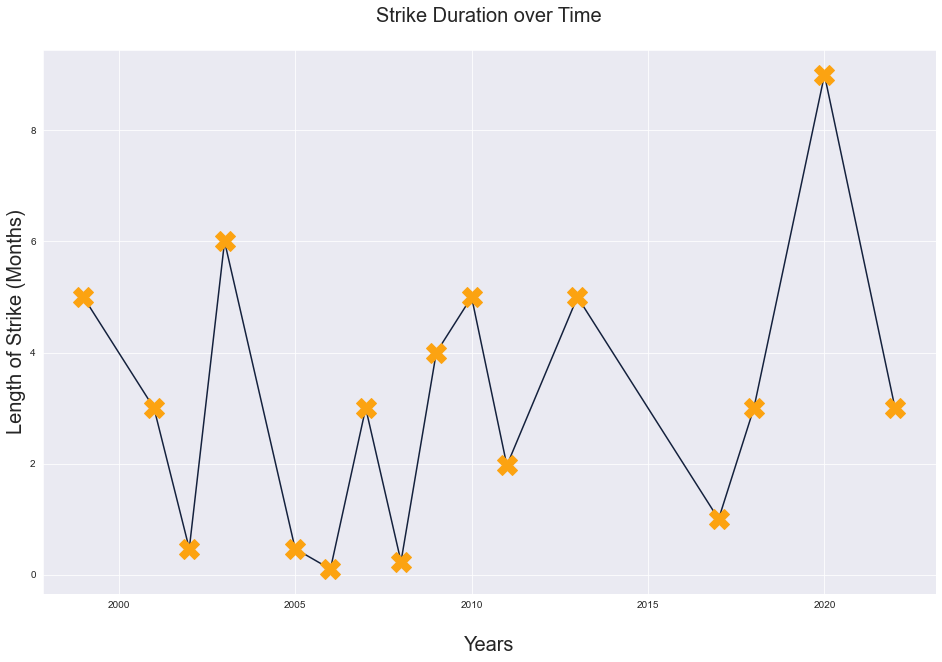

In [11]:
# LineGraph with MatplotLib
plt.figure(figsize=(16,10)) # Change Size of Graphic
sns.set_style('darkgrid')

plt.plot(line_graph,'X-',color = '#14213d',mec = '#fca311',mfc = '#fca311',ms = 20)
plt.xlabel('\nYears',fontdict=font_set)
plt.ylabel('Length of Strike (Months)',fontdict=font_set)
plt.title('Strike Duration over Time\n',fontdict=font_set)
plt.show()

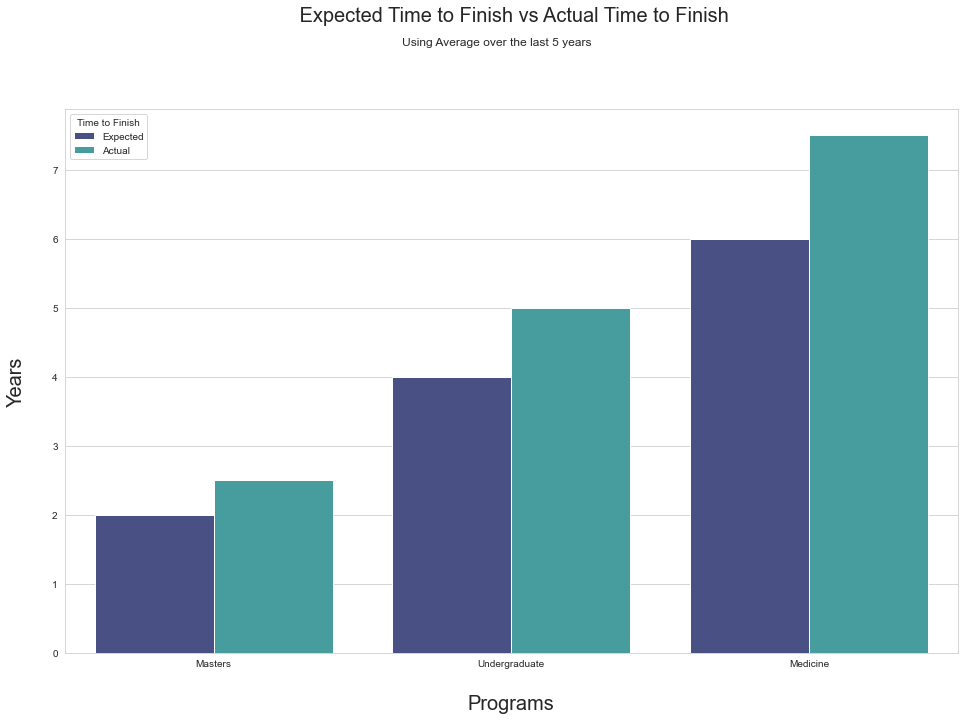

In [12]:
# BarChart with Seaborn
plt.figure(figsize=(16,10)) # Change Size of Graphic
sns.set_style('whitegrid')


df_barchart = df_barchart.melt(id_vars='Programs',value_name='Years',var_name='Time to Finish')
sns.barplot(x='Programs',y='Years',hue='Time to Finish',data=df_barchart,palette='mako')

plt.title(label=' Expected Time to Finish vs Actual Time to Finish' , fontdict=font_set,y=1.15)
plt.suptitle(t='Using Average over the last 5 years')
plt.xlabel('\nPrograms',fontdict=font_set)
plt.ylabel('Years\n',fontdict=font_set)
plt.show()
